In [1]:
#!/usr/bin/env python
from sqlalchemy import MetaData
from sqlalchemy import create_engine
from sqlalchemy import Integer, String
from sqlalchemy import Table, Column, ForeignKey
from sqlalchemy import sql, select, join, desc
from sqlalchemy.sql import func
import pandas as pd
import matplotlib.pyplot as pt


In [2]:

#Create a Engine object which is our handle into the database.
engine = create_engine('sqlite:///world.sqlite')

#Connect to the database
conn = engine.connect()

#Read the metadata from the existing database.
#Since the database already exists and has tables defined, we can create Python objects based on these automatically.
DataBaseInfo=MetaData(engine)


In [3]:

# Auto-create the objects based on the metadata read into the DBInfo.
country=Table('country', DataBaseInfo, autoload=True)
city=Table('city', DataBaseInfo, autoload=True)

# Mirroring this command: SELECT country.Code, country.Population, country.LifeExpectancy SUM(city.Population), FROM country JOIN city 
# ON Code=CountryCode GROUP BY Code;
query=select([country.c.Code, country.c.Population, func.sum(city.c.Population).label("sum_city_population"), country.c.LifeExpectancy])
query=query.select_from(join(query.froms[0], city, country.c.Code==city.c.CountryCode)).group_by(country.c.Code)


In [4]:
#Reading SQL query results into a Pandas data frame
df=pd.read_sql(query, conn)
df.head(7)

,Code,Population,sum_city_population,LifeExpectancy
0,ABW,103000,29034,78.4
1,AFG,22720000,2332100,45.9
2,AGO,12878000,2561600,38.3
3,AIA,8000,1556,76.1
4,ALB,3401200,270000,71.6
5,AND,78000,21189,83.5
6,ANT,217000,2345,74.7


In [5]:
#Calculating the ratio by dividing 'sum_city_population' column by 'Population' column,
#Then assigning to a new column named 'ratio'
df["ratio"] = df["sum_city_population"]/df["Population"]
df.head(7)

,Code,Population,sum_city_population,LifeExpectancy,ratio
0,ABW,103000,29034,78.4,0.281883
1,AFG,22720000,2332100,45.9,0.102645
2,AGO,12878000,2561600,38.3,0.198913
3,AIA,8000,1556,76.1,0.194500
4,ALB,3401200,270000,71.6,0.079384
5,AND,78000,21189,83.5,0.271654
6,ANT,217000,2345,74.7,0.010806


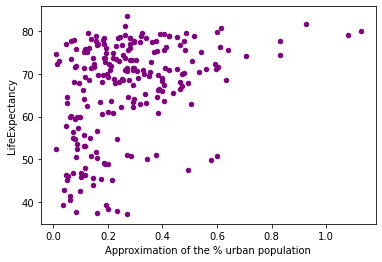

In [10]:
#Graph plot
df.plot.scatter(x='ratio', y='LifeExpectancy', c='purple')
pt.xlabel("Approximation of the % urban population")
pt.savefig('Bonus_P-5.jpeg', dpi=600)
pt.show()
